In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

In [102]:
path = 'C:/Users/nipun/Documents/Jupyter/Machine Learning Exercises/data/ex2data2.txt'
data = pd.read_csv(path, header = None, names = ['Test 1', 'Test 2', 'Accepted'])
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [91]:
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]

Text(0,0.5,'Test 2 Score')

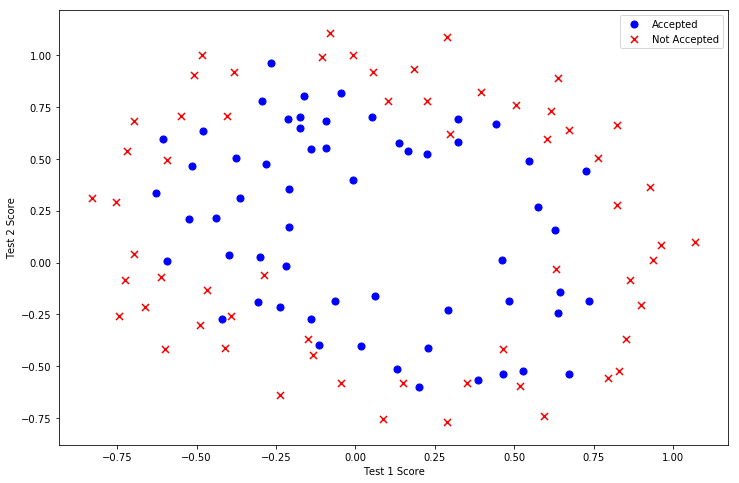

In [92]:
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s = 50, c = 'b', marker = 'o', label = 'Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s = 50, c = 'r', marker = 'x', label = 'Not Accepted')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [94]:
degree = 5  
x1 = data['Test 1']  
x2 = data['Test 2']

data.insert(3, 'Ones', 1)

for i in range(1, degree):  
    for j in range(0, i):
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data.drop('Test 1', axis=1, inplace=True)  
data.drop('Test 2', axis=1, inplace=True)

data.head()  

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [95]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [96]:
def costReg(theta, X, y, learningRate):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
    return np.sum(first - second) / (len(X)) + reg

In [97]:
def gradientReg(theta, X, y, learningRate):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])

        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])

    return grad

In [98]:
# set X and y (remember from above that we moved the label to column 0)
cols = data.shape[1]  
X2 = data.iloc[:,1:cols]  
y2 = data.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)  
y2 = np.array(y2.values)  
theta2 = np.zeros(11)

learningRate = 1

costReg(theta2, X2, y2, learningRate)  

0.6931471805599454

In [103]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))  
result2

(array([ 1.22702474e-04,  7.19893990e-05, -3.74156207e-04, -1.44256431e-04,
         2.93164898e-05, -5.64161014e-05, -1.02826490e-04, -2.83150428e-04,
         6.47303835e-07, -1.99697591e-04, -1.68479535e-05]), 96, 4)

In [100]:
def predict(theta, x):
    probability = sigmoid(x * theta.T)
    return[1 if x >= 0.5 else 0  for x in probability]

In [105]:
theta_min = np.matrix(result2[0])  
predictions = predict(theta_min, X2)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print ('accuracy = {0}%'.format(accuracy))

accuracy = 77%
